In [1]:
import librosa
import os
import numpy as np
import pandas as pd

# Import metadatas

In [2]:
sr = 22050

In [3]:
ravdess = pd.read_csv("/datasets/nicolas_facchinetti/processed_data/ravdess/processed_metadata.csv")
emovo = pd.read_csv("/datasets/nicolas_facchinetti/processed_data/emovo/processed_metadata.csv")
emodb = pd.read_csv("/datasets/nicolas_facchinetti/processed_data/emodb/processed_metadata.csv")

In [4]:
emodb

,path,filename,label,actor,gender,length
0,/datasets/nicolas_facchinetti/emodb/data/13a05...,13a05Tc.wav,sad,13,f,4.451383
1,/datasets/nicolas_facchinetti/emodb/data/14b09...,14b09Ac.wav,fear,14,f,2.287710
2,/datasets/nicolas_facchinetti/emodb/data/11b02...,11b02Na.wav,neutral,11,m,2.698821
3,/datasets/nicolas_facchinetti/emodb/data/09b03...,09b03Fd.wav,happy,9,f,3.312517
4,/datasets/nicolas_facchinetti/emodb/data/16b10...,16b10Fb.wav,happy,16,f,2.583537
...,...,...,...,...,...,...
530,/datasets/nicolas_facchinetti/emodb/data/15a04...,15a04Wa.wav,angry,15,m,1.945397
531,/datasets/nicolas_facchinetti/emodb/data/11b03...,11b03Td.wav,sad,11,m,5.905034
532,/datasets/nicolas_facchinetti/emodb/data/12b02...,12b02Na.wav,neutral,12,m,2.982086
533,/datasets/nicolas_facchinetti/emodb/data/14b01...,14b01Eb.wav,disgust,14,f,3.291791


In [5]:
ravdess

,path,filename,label,actor,gender,length
0,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-05-01-02-01-15.wav,angry,Actor_15,m,3.703719
1,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-08-01-02-02-15.wav,surprised,Actor_15,m,3.370068
2,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-07-02-02-02-15.wav,disgust,Actor_15,m,3.470159
3,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-04-01-02-01-15.wav,sad,Actor_15,m,3.303356
4,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-03-01-02-01-15.wav,happy,Actor_15,m,3.336689
...,...,...,...,...,...,...
1339,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-06-02-01-02-13.wav,fear,Actor_13,m,3.269977
1340,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-02-01-02-01-13.wav,calm,Actor_13,m,3.136463
1341,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-04-01-01-02-13.wav,sad,Actor_13,m,3.536871
1342,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-08-01-02-02-13.wav,surprised,Actor_13,m,3.036417


In [6]:
emovo

,path,filename,label,actor,gender,length
0,/datasets/nicolas_facchinetti/emovo/data/m3/gi...,gio-m3-l1.wav,happy,m3,m,5.205351
1,/datasets/nicolas_facchinetti/emovo/data/m3/gi...,gio-m3-b3.wav,happy,m3,m,1.877370
2,/datasets/nicolas_facchinetti/emovo/data/m3/pa...,pau-m3-n5.wav,fear,m3,m,4.394694
3,/datasets/nicolas_facchinetti/emovo/data/m3/tr...,tri-m3-b2.wav,sad,m3,m,2.773333
4,/datasets/nicolas_facchinetti/emovo/data/m3/tr...,tri-m3-l4.wav,sad,m3,m,3.370703
...,...,...,...,...,...,...
583,/datasets/nicolas_facchinetti/emovo/data/m2/di...,dis-m2-b3.wav,disgust,m2,m,2.474694
584,/datasets/nicolas_facchinetti/emovo/data/m2/so...,sor-m2-d1.wav,surprised,m2,m,2.090703
585,/datasets/nicolas_facchinetti/emovo/data/m2/pa...,pau-m2-b3.wav,fear,m2,m,1.962676
586,/datasets/nicolas_facchinetti/emovo/data/m2/tr...,tri-m2-n2.wav,sad,m2,m,2.368027


In [7]:
frames = {'emodb': emodb, 'emovo': emovo, 'ravdess': ravdess}

result = pd.concat(frames.values())
result

,path,filename,label,actor,gender,length
0,/datasets/nicolas_facchinetti/emodb/data/13a05...,13a05Tc.wav,sad,13,f,4.451383
1,/datasets/nicolas_facchinetti/emodb/data/14b09...,14b09Ac.wav,fear,14,f,2.287710
2,/datasets/nicolas_facchinetti/emodb/data/11b02...,11b02Na.wav,neutral,11,m,2.698821
3,/datasets/nicolas_facchinetti/emodb/data/09b03...,09b03Fd.wav,happy,9,f,3.312517
4,/datasets/nicolas_facchinetti/emodb/data/16b10...,16b10Fb.wav,happy,16,f,2.583537
...,...,...,...,...,...,...
1339,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-06-02-01-02-13.wav,fear,Actor_13,m,3.269977
1340,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-02-01-02-01-13.wav,calm,Actor_13,m,3.136463
1341,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-04-01-01-02-13.wav,sad,Actor_13,m,3.536871
1342,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-08-01-02-02-13.wav,surprised,Actor_13,m,3.036417


# Example fetures extraction

In [8]:
example_audio = emovo.path[10]
samples, sample_rate = librosa.load(example_audio, sr=sr)

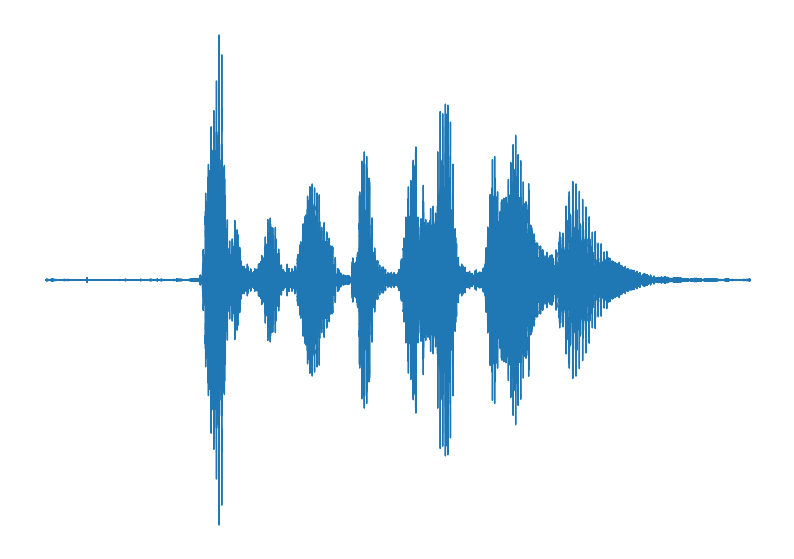

In [9]:
import librosa.display
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.axis('off')
librosa.display.waveshow(samples, sr=sample_rate)

In [10]:
import IPython
IPython.display.Audio(samples, rate=sr)

/home/nicolas/.conda/envs/thesis/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  return f(*args, **kwargs)


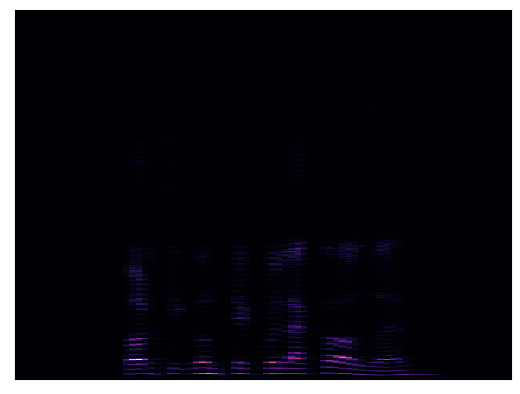

In [11]:
# convert to spectrogram
sgram = librosa.stft(samples, n_fft=2048, hop_length=512)
librosa.display.specshow(sgram)

/tmp/ipykernel_2488722/29967690.py:2: FutureWarning: Pass y=[-0.00037141 -0.00036096 -0.00038768 ... -0.00040691 -0.00047149
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_scale_sgram = librosa.feature.melspectrogram(samples, sr=sample_rate, n_fft=2048, hop_length=512, n_mels=64)


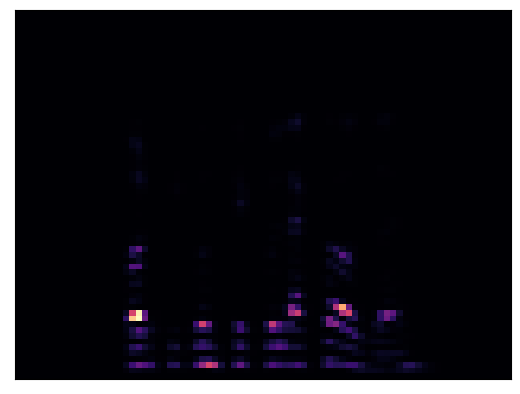

In [12]:
# use the mel-scale instead of raw frequency
mel_scale_sgram = librosa.feature.melspectrogram(samples, sr=sample_rate, n_fft=2048, hop_length=512, n_mels=64)
librosa.display.specshow(mel_scale_sgram)

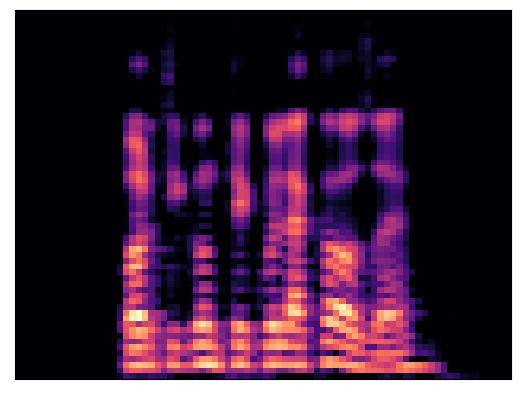

In [13]:
# use the decibel scale to get the final Mel Spectrogram
log_mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(log_mel_sgram, sr=sample_rate)

Try to trim start and end silence

/tmp/ipykernel_2488722/560039075.py:2: FutureWarning: Pass y=[-1.0199300e-03 -1.1586241e-03 -1.0818732e-03 ... -7.1243681e-05
  8.6745113e-04  5.7539588e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_trimmed = librosa.feature.melspectrogram(trimmed, sr=sample_rate, n_fft=2048, hop_length=512, n_mels=64)


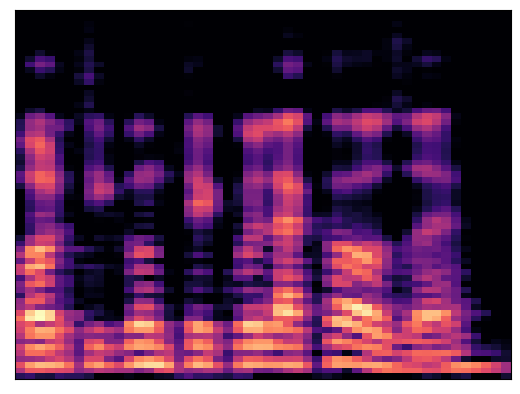

In [14]:
trimmed = librosa.effects.trim(samples, top_db=30, frame_length=512, hop_length=64)[0]
mel_trimmed = librosa.feature.melspectrogram(trimmed, sr=sample_rate, n_fft=2048, hop_length=512, n_mels=64)
log_mel_trimmed = librosa.amplitude_to_db(mel_trimmed, ref=np.min)
librosa.display.specshow(log_mel_trimmed, sr=sr)
IPython.display.Audio(trimmed, rate=sr)

# Length analysis

Original length of all the samples

count    2467.000000
mean        3.370467
std         0.940908
min         1.225533
25%         2.816009
50%         3.536871
75%         3.837188
max        13.994694
Name: length, dtype: float64

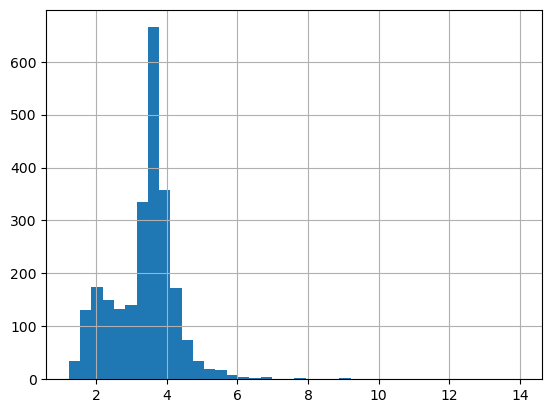

In [15]:
result["length"].hist(bins=40)
stock_l = result["length"].describe()
stock_l

# Load and trim the samples for each dataset

In [16]:
def load_samples(metadata):
    samples = []
    for _, data in metadata.iterrows():
        # load audio data
        path = data["path"]
        sample, _ = librosa.load(path, sr=sr)
        trimmed = librosa.effects.trim(sample, top_db=30, frame_length=512, hop_length=64)[0]
        samples.append(trimmed)
    return samples

In [17]:
dataset_samples = {}
for dataset in frames:
    print(f'Processing {dataset}')
    dataset_samples[dataset] = load_samples(frames[dataset])

Processing emodb
Processing emovo
Processing ravdess


In [18]:
len(dataset_samples['emodb']), len(frames['emodb'])

(535, 535)

Update metadata with new lengths

In [19]:
for d in dataset_samples:
    trimmed_length = [len(s)/sr for s in dataset_samples[d]]
    frames[d]['trimmed_lenght'] = trimmed_length

In [20]:
result = pd.concat(frames.values())
result

,path,filename,label,actor,gender,length,trimmed_lenght
0,/datasets/nicolas_facchinetti/emodb/data/13a05...,13a05Tc.wav,sad,13,f,4.451383,4.451383
1,/datasets/nicolas_facchinetti/emodb/data/14b09...,14b09Ac.wav,fear,14,f,2.287710,2.173968
2,/datasets/nicolas_facchinetti/emodb/data/11b02...,11b02Na.wav,neutral,11,m,2.698821,2.496145
3,/datasets/nicolas_facchinetti/emodb/data/09b03...,09b03Fd.wav,happy,9,f,3.312517,3.123084
4,/datasets/nicolas_facchinetti/emodb/data/16b10...,16b10Fb.wav,happy,16,f,2.583537,2.266848
...,...,...,...,...,...,...,...
1339,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-06-02-01-02-13.wav,fear,Actor_13,m,3.269977,1.343855
1340,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-02-01-02-01-13.wav,calm,Actor_13,m,3.136463,1.250975
1341,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-04-01-01-02-13.wav,sad,Actor_13,m,3.536871,1.599274
1342,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-08-01-02-02-13.wav,surprised,Actor_13,m,3.036417,1.094240


Trimmed length analysis

,length,trimmed_lenght
count,2467.000000,2467.000000
mean,3.370467,2.153009
std,0.940908,0.932300
min,1.225533,0.891066
25%,2.816009,1.573152
50%,3.536871,1.875011
75%,3.837188,2.452608
max,13.994694,13.952290


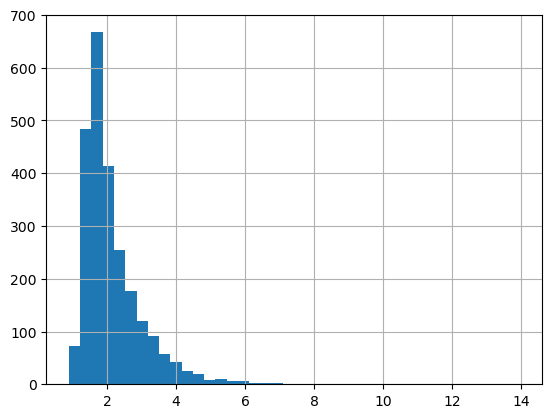

In [21]:
result["trimmed_lenght"].hist(bins=40)
trim_l = result["trimmed_lenght"].describe()
pd.concat([stock_l, trim_l], axis=1)

In [22]:
min_l = result["trimmed_lenght"].describe()["min"]
min_s = result.loc[result['trimmed_lenght'] == min_l]
min_s

,path,filename,label,actor,gender,length,trimmed_lenght
451,/datasets/nicolas_facchinetti/emovo/data/m1/pa...,pau-m1-d2.wav,fear,m1,m,1.92,0.891066


In [23]:
short_sample = dataset_samples['emovo'][451]
IPython.display.Audio(short_sample, rate=sr)

In [24]:
min_sample = librosa.load(min_s.path[451], sr=sr)[0]
IPython.display.Audio(min_sample, rate=sr)

/tmp/ipykernel_2488722/3212414529.py:1: FutureWarning: Pass y=[ 1.9243392e-04  8.1454101e-04  4.8776669e-04 ...  2.2775518e-04
 -2.3595321e-04  2.2523127e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_trimmed = librosa.feature.melspectrogram(short_sample, sr=sample_rate, n_fft=2048, hop_length=512, n_mels=128)


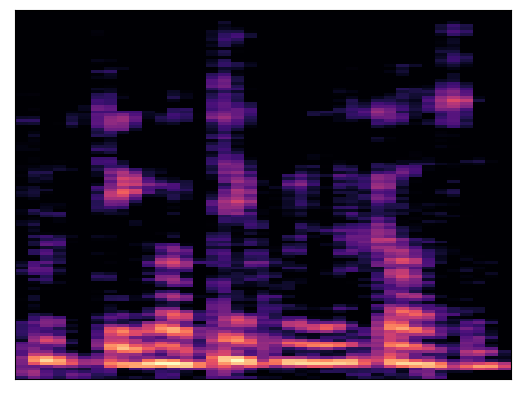

In [25]:
mel_trimmed = librosa.feature.melspectrogram(short_sample, sr=sample_rate, n_fft=2048, hop_length=512, n_mels=128)
log_mel_trimmed = librosa.amplitude_to_db(mel_trimmed, ref=np.min)
librosa.display.specshow(log_mel_trimmed, sr=sr)

# Data augmentation

Aument the datasets' records

In [26]:
def time_stretch_sample(sample, factors):
    stretched = []
    for f in factors:
        stretched.append(librosa.effects.time_stretch(sample, f))
    return stretched

def pitch_shift_sample(sample, factors, sr):
    stretched = []
    for f in factors:
        stretched.append(librosa.effects.pitch_shift(sample, sr, f))
    return stretched

time_factors = [0.81, 0.93, 1.07, 1.23]
pitch_factors = [-3, -1.5, +1.5, +3]


In [27]:
example = dataset_samples['emovo'][100]
IPython.display.Audio(example, rate=sr)

In [28]:
s = time_stretch_sample(example, time_factors)
IPython.display.Audio(s[3], rate=sr)

/tmp/ipykernel_2488722/918468051.py:4: FutureWarning: Pass rate=0.81 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  stretched.append(librosa.effects.time_stretch(sample, f))
/tmp/ipykernel_2488722/918468051.py:4: FutureWarning: Pass rate=0.93 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  stretched.append(librosa.effects.time_stretch(sample, f))
/tmp/ipykernel_2488722/918468051.py:4: FutureWarning: Pass rate=1.07 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  stretched.append(librosa.effects.time_stretch(sample, f))
/tmp/ipykernel_2488722/918468051.py:4: FutureWarning: Pass rate=1.23 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  stretched.append(librosa.effects.time_stretch(sample, f))


In [29]:
s = pitch_shift_sample(example, pitch_factors, sr)
IPython.display.Audio(s[2], rate=sr)

/tmp/ipykernel_2488722/918468051.py:10: FutureWarning: Pass sr=22050, n_steps=-3 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  stretched.append(librosa.effects.pitch_shift(sample, sr, f))
/tmp/ipykernel_2488722/918468051.py:10: FutureWarning: Pass sr=22050, n_steps=-1.5 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  stretched.append(librosa.effects.pitch_shift(sample, sr, f))
/tmp/ipykernel_2488722/918468051.py:10: FutureWarning: Pass sr=22050, n_steps=1.5 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  stretched.append(librosa.effects.pitch_shift(sample, sr, f))
/tmp/ipykernel_2488722/918468051.py:10: FutureWarning: Pass sr=22050, n_steps=3 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  stretched.append(librosa.effects.pitch_shift(sample, sr, f))


# Split and repeat

Let's keep a sample length equal to 3 seconds, repeat the shorter while split the longer segments. Throw away samples below min lenght

In [30]:
target_l = 3
buffer_length = target_l*sr
target_l, buffer_length

(3, 66150)

In [31]:
import math 
def repeat_sample(data, length):
    n = math.ceil(length/len(data))
    data = np.tile(data, n)
    return data[:int(length)]

In [32]:
repeated = repeat_sample(short_sample, buffer_length)
len(repeated)/sr

3.0

/tmp/ipykernel_2488722/98916901.py:1: FutureWarning: Pass y=[0.00019243 0.00081454 0.00048777 ... 0.00691454 0.00729674 0.00913202] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  log_mel_trimmed = librosa.amplitude_to_db(librosa.feature.melspectrogram(repeated, sr=sample_rate, n_fft=2048, hop_length=512, n_mels=128), ref=np.min)


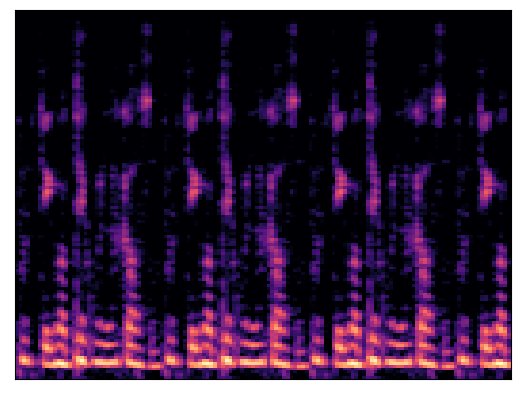

In [33]:
log_mel_trimmed = librosa.amplitude_to_db(librosa.feature.melspectrogram(repeated, sr=sample_rate, n_fft=2048, hop_length=512, n_mels=128), ref=np.min)
librosa.display.specshow(log_mel_trimmed, sr=sr)

In [34]:
IPython.display.Audio(repeated, rate=sr)

In [35]:
max_l = result["trimmed_lenght"].describe()["max"]
max_s = result.loc[result['trimmed_lenght'] == max_l, "path"]
max_s

423    /datasets/nicolas_facchinetti/emovo/data/m1/tr...
Name: path, dtype: object

In [36]:
long_sample = dataset_samples['emovo'][423]
long_sample, len(long_sample)/sr

(array([-0.00097635, -0.00135224, -0.00080217, ...,  0.00026371,
        -0.00040826,  0.00074105], dtype=float32),
 13.952290249433107)

In [37]:
IPython.display.Audio(long_sample, rate=sr)

In [38]:
def split_sample(audio, length, minimum):
    samples_total = len(audio)
    samples_wrote = 0
    segments = []
    
    to_process = samples_total - samples_wrote
    while to_process > minimum:
        segment = audio[samples_wrote : (samples_wrote + length)]
        segments.append(segment)
        samples_wrote += length
        to_process = samples_total - samples_wrote
    return segments

In [39]:
splitted = split_sample(long_sample, int(buffer_length), int(min_l))
[len(s)/sr for s in splitted]

[3.0, 3.0, 3.0, 3.0, 1.9522902494331065]

In [40]:
IPython.display.Audio(splitted[4], rate=sr)

/tmp/ipykernel_2488722/4093863063.py:1: FutureWarning: Pass y=[-0.00097635 -0.00135224 -0.00080217 ... -0.00116912  0.00013541
 -0.00040111] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  log_mel_trimmed = librosa.amplitude_to_db(librosa.feature.melspectrogram(splitted[0], sr=sample_rate, n_fft=2048, hop_length=512, n_mels=128), ref=np.min)


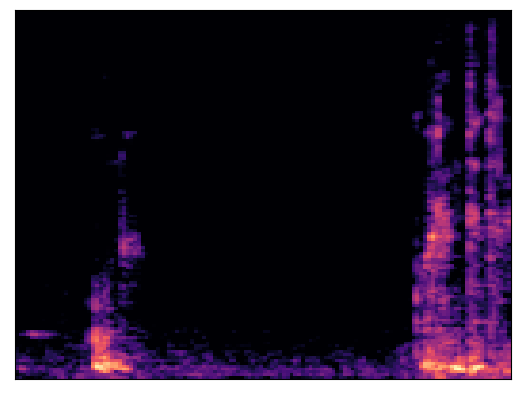

In [41]:
log_mel_trimmed = librosa.amplitude_to_db(librosa.feature.melspectrogram(splitted[0], sr=sample_rate, n_fft=2048, hop_length=512, n_mels=128), ref=np.min)
librosa.display.specshow(log_mel_trimmed, sr=sr)

# Dataset processing

Split and repeat all the samples to the same length, then extract log Mel-specotrograms from all the samples

In [42]:
result.head()

,path,filename,label,actor,gender,length,trimmed_lenght
0,/datasets/nicolas_facchinetti/emodb/data/13a05...,13a05Tc.wav,sad,13,f,4.451383,4.451383
1,/datasets/nicolas_facchinetti/emodb/data/14b09...,14b09Ac.wav,fear,14,f,2.287710,2.173968
2,/datasets/nicolas_facchinetti/emodb/data/11b02...,11b02Na.wav,neutral,11,m,2.698821,2.496145
3,/datasets/nicolas_facchinetti/emodb/data/09b03...,09b03Fd.wav,happy,9,f,3.312517,3.123084
4,/datasets/nicolas_facchinetti/emodb/data/16b10...,16b10Fb.wav,happy,16,f,2.583537,2.266848


In [43]:
from tqdm.notebook import tqdm

def process_audio_files(audio_data, metadata):
    sgram_list = []
    audio_list = []
    mod_data = []
    for idx, data in tqdm(metadata.iterrows(), total=metadata.shape[0]):
        # load audio data
        sample = audio_data[idx]
        
        # data augmentation
        pitched = [(s,1) for s in pitch_shift_sample(sample, pitch_factors, sr)]
        stretched = [(s,2) for s in time_stretch_sample(sample, time_factors)]
        list_sample = [(sample, 0)] + pitched + stretched
        
        splitted_list = []
        # split the larger segmtents
        for s in list_sample:
            if len(s[0]) >= buffer_length:
                splitted = split_sample(s[0], int(buffer_length), int(min_l))
                # trim silent parts in each splitted frame
                samples = [(librosa.effects.trim(splitted_sample, top_db=30, frame_length=512, hop_length=64)[0], num, s[1])
                           for num, splitted_sample in enumerate(splitted)]
                splitted_list += samples
            else:
                splitted_list.append((s[0], 0, s[1]))
           
        # repeat the shorter segments
        for sample in splitted_list:
            s = sample[0]
            if len(s) < buffer_length:
                s = repeat_sample(s, buffer_length)
            
            # compute log mel-spectrograms
            mel_scale_sgram = librosa.feature.melspectrogram(y=s, sr=sr, n_fft=2048, hop_length=512, n_mels=128)
            log_mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
            
            # save computation
            audio_list.append(s)
            sgram_list.append(log_mel_sgram)
            mod_data.append([data["path"], data["filename"], sample[1], data["label"], data["actor"], data["gender"], sample[2]])

    df_info_mod = pd.DataFrame(mod_data, columns=['path', 'filename', 'chunk', 'label', 'actor', 'gender', 'mod'])
    return sgram_list, audio_list, df_info_mod

In [44]:
frames['emovo']

,path,filename,label,actor,gender,length,trimmed_lenght
0,/datasets/nicolas_facchinetti/emovo/data/m3/gi...,gio-m3-l1.wav,happy,m3,m,5.205351,3.880635
1,/datasets/nicolas_facchinetti/emovo/data/m3/gi...,gio-m3-b3.wav,happy,m3,m,1.877370,1.384490
2,/datasets/nicolas_facchinetti/emovo/data/m3/pa...,pau-m3-n5.wav,fear,m3,m,4.394694,3.430748
3,/datasets/nicolas_facchinetti/emovo/data/m3/tr...,tri-m3-b2.wav,sad,m3,m,2.773333,1.872109
4,/datasets/nicolas_facchinetti/emovo/data/m3/tr...,tri-m3-l4.wav,sad,m3,m,3.370703,2.159456
...,...,...,...,...,...,...,...
583,/datasets/nicolas_facchinetti/emovo/data/m2/di...,dis-m2-b3.wav,disgust,m2,m,2.474694,2.397460
584,/datasets/nicolas_facchinetti/emovo/data/m2/so...,sor-m2-d1.wav,surprised,m2,m,2.090703,1.390295
585,/datasets/nicolas_facchinetti/emovo/data/m2/pa...,pau-m2-b3.wav,fear,m2,m,1.962676,1.245170
586,/datasets/nicolas_facchinetti/emovo/data/m2/tr...,tri-m2-n2.wav,sad,m2,m,2.368027,2.118821


In [45]:
process_audio_files(dataset_samples['emovo'], frames['emovo'].iloc[[0]]) 

  0%|          | 0/1 [00:00<?, ?it/s]

/tmp/ipykernel_2488722/918468051.py:10: FutureWarning: Pass sr=22050, n_steps=-3 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  stretched.append(librosa.effects.pitch_shift(sample, sr, f))
/tmp/ipykernel_2488722/918468051.py:10: FutureWarning: Pass sr=22050, n_steps=-1.5 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  stretched.append(librosa.effects.pitch_shift(sample, sr, f))
/tmp/ipykernel_2488722/918468051.py:10: FutureWarning: Pass sr=22050, n_steps=1.5 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  stretched.append(librosa.effects.pitch_shift(sample, sr, f))
/tmp/ipykernel_2488722/918468051.py:10: FutureWarning: Pass sr=22050, n_steps=3 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  stretched.append(librosa.effects.pitch_shift(sample, sr, f))
/tmp/ipykernel_2488722/918468051.p

([array([[52.498077, 52.498077, 59.40785 , ..., 84.43124 , 70.16484 ,
          73.72559 ],
         [52.498077, 52.498077, 52.498077, ..., 85.90402 , 59.414284,
          71.19209 ],
         [57.267952, 59.50211 , 52.841896, ..., 76.87118 , 60.81877 ,
          76.905   ],
         ...,
         [52.498077, 52.498077, 52.498077, ..., 52.498077, 52.498077,
          52.498077],
         [52.498077, 52.498077, 52.498077, ..., 52.498077, 52.498077,
          52.498077],
         [52.498077, 52.498077, 52.498077, ..., 52.498077, 52.498077,
          52.498077]], dtype=float32),
  array([[71.3887  , 59.786358, 49.47307 , ..., 68.13191 , 67.8307  ,
          73.37497 ],
         [73.22199 , 61.268024, 49.47307 , ..., 49.47307 , 61.42982 ,
          75.031784],
         [74.61876 , 61.72237 , 49.47307 , ..., 49.47307 , 65.05873 ,
          79.45101 ],
         ...,
         [49.47307 , 49.47307 , 49.47307 , ..., 49.47307 , 49.47307 ,
          49.47307 ],
         [49.47307 , 49.47307 , 49.

In [46]:
elaborated_data = {}
for dataset in frames:
    sgram, audio, df = process_audio_files(dataset_samples[dataset], frames[dataset])
    print(f"Done {dataset}")
    elaborated_data[dataset] = {"sgram": sgram, 'audio':audio, "df":df}

  0%|          | 0/535 [00:00<?, ?it/s]

/tmp/ipykernel_2488722/918468051.py:10: FutureWarning: Pass sr=22050, n_steps=-3 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  stretched.append(librosa.effects.pitch_shift(sample, sr, f))
/tmp/ipykernel_2488722/918468051.py:10: FutureWarning: Pass sr=22050, n_steps=-1.5 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  stretched.append(librosa.effects.pitch_shift(sample, sr, f))
/tmp/ipykernel_2488722/918468051.py:10: FutureWarning: Pass sr=22050, n_steps=1.5 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  stretched.append(librosa.effects.pitch_shift(sample, sr, f))
/tmp/ipykernel_2488722/918468051.py:10: FutureWarning: Pass sr=22050, n_steps=3 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  stretched.append(librosa.effects.pitch_shift(sample, sr, f))
/tmp/ipykernel_2488722/918468051.p

Done emodb


  0%|          | 0/588 [00:00<?, ?it/s]

/tmp/ipykernel_2488722/918468051.py:10: FutureWarning: Pass sr=22050, n_steps=-3 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  stretched.append(librosa.effects.pitch_shift(sample, sr, f))
/tmp/ipykernel_2488722/918468051.py:10: FutureWarning: Pass sr=22050, n_steps=-1.5 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  stretched.append(librosa.effects.pitch_shift(sample, sr, f))
/tmp/ipykernel_2488722/918468051.py:10: FutureWarning: Pass sr=22050, n_steps=1.5 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  stretched.append(librosa.effects.pitch_shift(sample, sr, f))
/tmp/ipykernel_2488722/918468051.py:10: FutureWarning: Pass sr=22050, n_steps=3 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  stretched.append(librosa.effects.pitch_shift(sample, sr, f))
/tmp/ipykernel_2488722/918468051.p

Done emovo


  0%|          | 0/1344 [00:00<?, ?it/s]

/tmp/ipykernel_2488722/918468051.py:10: FutureWarning: Pass sr=22050, n_steps=-3 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  stretched.append(librosa.effects.pitch_shift(sample, sr, f))
/tmp/ipykernel_2488722/918468051.py:10: FutureWarning: Pass sr=22050, n_steps=-1.5 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  stretched.append(librosa.effects.pitch_shift(sample, sr, f))
/tmp/ipykernel_2488722/918468051.py:10: FutureWarning: Pass sr=22050, n_steps=1.5 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  stretched.append(librosa.effects.pitch_shift(sample, sr, f))
/tmp/ipykernel_2488722/918468051.py:10: FutureWarning: Pass sr=22050, n_steps=3 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  stretched.append(librosa.effects.pitch_shift(sample, sr, f))
/tmp/ipykernel_2488722/918468051.p

Done ravdess


In [47]:
a = len(frames["emodb"])
b = len(elaborated_data["emodb"]["df"]) 
a, b, b/a 

(535, 6182, 11.555140186915889)

In [48]:
a = len(frames["emovo"])
b = len(elaborated_data["emovo"]["df"])
a, b, b/a

(588, 6906, 11.744897959183673)

In [49]:
a = len(frames["ravdess"])
b = len(elaborated_data["ravdess"]["df"])
a, b, b/a

(1344, 12456, 9.267857142857142)

<AxesSubplot:>

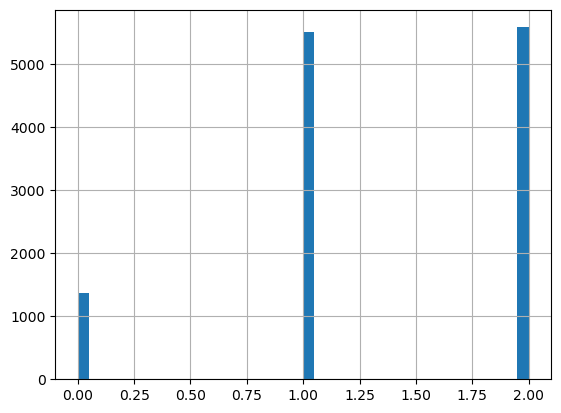

In [50]:
elaborated_data["ravdess"]["df"]["mod"].hist(bins=40)

In [51]:
elaborated_data["emovo"]["df"].head(20)

,path,filename,chunk,label,actor,gender,mod
0,/datasets/nicolas_facchinetti/emovo/data/m3/gi...,gio-m3-l1.wav,0,happy,m3,m,0
1,/datasets/nicolas_facchinetti/emovo/data/m3/gi...,gio-m3-l1.wav,1,happy,m3,m,0
2,/datasets/nicolas_facchinetti/emovo/data/m3/gi...,gio-m3-l1.wav,0,happy,m3,m,1
3,/datasets/nicolas_facchinetti/emovo/data/m3/gi...,gio-m3-l1.wav,1,happy,m3,m,1
4,/datasets/nicolas_facchinetti/emovo/data/m3/gi...,gio-m3-l1.wav,0,happy,m3,m,1
5,/datasets/nicolas_facchinetti/emovo/data/m3/gi...,gio-m3-l1.wav,1,happy,m3,m,1
6,/datasets/nicolas_facchinetti/emovo/data/m3/gi...,gio-m3-l1.wav,0,happy,m3,m,1
7,/datasets/nicolas_facchinetti/emovo/data/m3/gi...,gio-m3-l1.wav,1,happy,m3,m,1
8,/datasets/nicolas_facchinetti/emovo/data/m3/gi...,gio-m3-l1.wav,0,happy,m3,m,1
9,/datasets/nicolas_facchinetti/emovo/data/m3/gi...,gio-m3-l1.wav,1,happy,m3,m,1


In [52]:
elaborated_data["ravdess"]["df"]

,path,filename,chunk,label,actor,gender,mod
0,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-05-01-02-01-15.wav,0,angry,Actor_15,m,0
1,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-05-01-02-01-15.wav,0,angry,Actor_15,m,1
2,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-05-01-02-01-15.wav,0,angry,Actor_15,m,1
3,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-05-01-02-01-15.wav,0,angry,Actor_15,m,1
4,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-05-01-02-01-15.wav,0,angry,Actor_15,m,1
...,...,...,...,...,...,...,...
12451,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-07-01-01-02-13.wav,0,disgust,Actor_13,m,1
12452,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-07-01-01-02-13.wav,0,disgust,Actor_13,m,2
12453,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-07-01-01-02-13.wav,0,disgust,Actor_13,m,2
12454,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-07-01-01-02-13.wav,0,disgust,Actor_13,m,2


In [53]:
len(elaborated_data["emovo"]["audio"][0])/sr, len(elaborated_data["emovo"]["audio"][1])/sr

(3.0, 3.0)

In [54]:
IPython.display.Audio(elaborated_data["emovo"]["audio"][19], rate=sr)

# Data distribution

Actors distribution

(<AxesSubplot:>, <AxesSubplot:>)

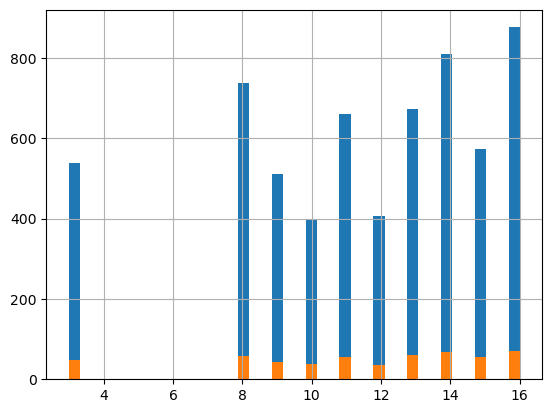

In [55]:
elaborated_data['emodb']['df']["actor"].hist(bins=40), frames['emodb']['actor'].hist(bins=40)

(<AxesSubplot:>, <AxesSubplot:>)

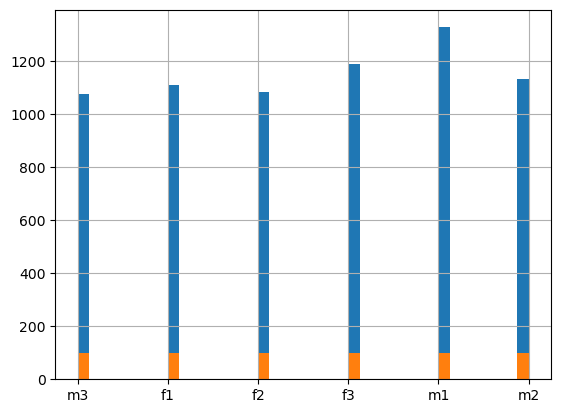

In [56]:
elaborated_data['emovo']['df']["actor"].hist(bins=40), frames['emovo']['actor'].hist(bins=40)

(<AxesSubplot:>, <AxesSubplot:>)

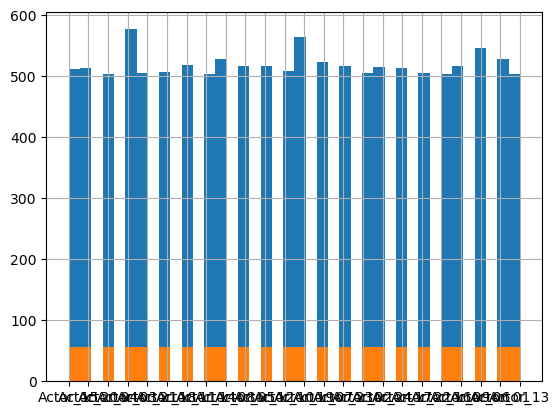

In [57]:
elaborated_data['ravdess']['df']["actor"].hist(bins=40), frames['ravdess']['actor'].hist(bins=40)

In [58]:
elaborated_data["ravdess"]["df"]

,path,filename,chunk,label,actor,gender,mod
0,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-05-01-02-01-15.wav,0,angry,Actor_15,m,0
1,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-05-01-02-01-15.wav,0,angry,Actor_15,m,1
2,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-05-01-02-01-15.wav,0,angry,Actor_15,m,1
3,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-05-01-02-01-15.wav,0,angry,Actor_15,m,1
4,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-05-01-02-01-15.wav,0,angry,Actor_15,m,1
...,...,...,...,...,...,...,...
12451,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-07-01-01-02-13.wav,0,disgust,Actor_13,m,1
12452,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-07-01-01-02-13.wav,0,disgust,Actor_13,m,2
12453,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-07-01-01-02-13.wav,0,disgust,Actor_13,m,2
12454,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-07-01-01-02-13.wav,0,disgust,Actor_13,m,2


Labels distribution

(<AxesSubplot:>, <AxesSubplot:>)

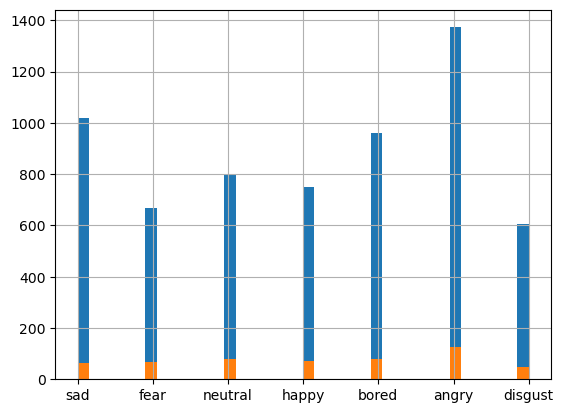

In [59]:
elaborated_data['emodb']['df']["label"].hist(bins=40), frames['emodb']["label"].hist(bins=40)

(<AxesSubplot:>, <AxesSubplot:>)

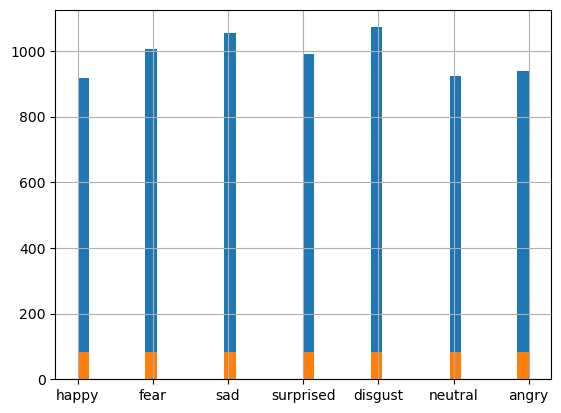

In [60]:
elaborated_data['emovo']['df']["label"].hist(bins=40), frames['emovo']["label"].hist(bins=40)

(<AxesSubplot:>, <AxesSubplot:>)

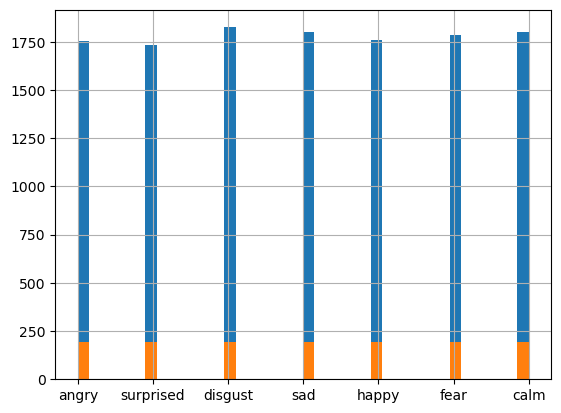

In [61]:
elaborated_data['ravdess']['df']["label"].hist(bins=40), frames['ravdess']["label"].hist(bins=40)

# Convert sgrams data to log mel images

Next we can take the previous obtained list of log mel-scaled spectrogram and finally convert them to images and save to a folder img_data.

In [62]:
image_metadata = {}

import pathlib
for g in frames:
    pathlib.Path(f'/datasets/nicolas_facchinetti/img_data/{g}/').mkdir(parents=True, exist_ok=True)

In [63]:
elaborated_data['emodb']["df"]

,path,filename,chunk,label,actor,gender,mod
0,/datasets/nicolas_facchinetti/emodb/data/13a05...,13a05Tc.wav,0,sad,13,f,0
1,/datasets/nicolas_facchinetti/emodb/data/13a05...,13a05Tc.wav,1,sad,13,f,0
2,/datasets/nicolas_facchinetti/emodb/data/13a05...,13a05Tc.wav,0,sad,13,f,1
3,/datasets/nicolas_facchinetti/emodb/data/13a05...,13a05Tc.wav,1,sad,13,f,1
4,/datasets/nicolas_facchinetti/emodb/data/13a05...,13a05Tc.wav,0,sad,13,f,1
...,...,...,...,...,...,...,...
6177,/datasets/nicolas_facchinetti/emodb/data/08b01...,08b01Fe.wav,0,happy,8,f,1
6178,/datasets/nicolas_facchinetti/emodb/data/08b01...,08b01Fe.wav,0,happy,8,f,2
6179,/datasets/nicolas_facchinetti/emodb/data/08b01...,08b01Fe.wav,0,happy,8,f,2
6180,/datasets/nicolas_facchinetti/emodb/data/08b01...,08b01Fe.wav,0,happy,8,f,2


In [64]:
for g in frames:
    image_metadata[g] = []
    for count, sample in enumerate(tqdm(elaborated_data[g]["sgram"])):
        # label and filename
        label = elaborated_data[g]["df"].iloc[count]["label"]
        filename = f'/datasets/nicolas_facchinetti/img_data/{g}/{count}.png'
        actor = elaborated_data[g]["df"].iloc[count]["actor"]
        
        # save image to local drive
        fig, ax = plt.subplots(num=1,clear=True)
        # remove white margins
        fig.subplots_adjust(0,0,1,1)

        img = librosa.display.specshow(sample, sr=sr)
        plt.savefig(filename)
        plt.clf()
        # append to image metadata
        image_metadata[g].append([filename, label, actor])
    print(f'Done {g}')

  0%|          | 0/6182 [00:00<?, ?it/s]

Done emodb


  0%|          | 0/6906 [00:00<?, ?it/s]

Done emovo


  0%|          | 0/12456 [00:00<?, ?it/s]

Done ravdess


<Figure size 640x480 with 0 Axes>

In [65]:
image_metadata_df = {}
for d in frames:
    image_metadata_df[d] = pd.DataFrame(image_metadata[d], columns=["Path", "Label", "Actor"])

In [66]:
image_metadata_df["emodb"].head()

,Path,Label,Actor
0,/datasets/nicolas_facchinetti/img_data/emodb/0...,sad,13
1,/datasets/nicolas_facchinetti/img_data/emodb/1...,sad,13
2,/datasets/nicolas_facchinetti/img_data/emodb/2...,sad,13
3,/datasets/nicolas_facchinetti/img_data/emodb/3...,sad,13
4,/datasets/nicolas_facchinetti/img_data/emodb/4...,sad,13


# Save data

Save data for future computations

In [67]:
for dataset in image_metadata_df:
    image_metadata_df[dataset].to_csv(f"/datasets/nicolas_facchinetti/img_data/{dataset}_df.csv", index=False)